## PROJECT 1: GENERAL EDA (Task-2)
## Objective
Perform Exploratory Data Analysis (EDA) to:
- Clean the dataset
- Understand data distribution
- Identify patterns, trends, correlations, and outliers

## Step 1: Import Required Libraries
- Used for data handling, statistics, and visualization

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset sales_data.csv file

In [23]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-2\Dataset\sales_data.csv")
print("\nData Set Loaded Successfully.")
df.head()


Data Set Loaded Successfully.


,Category,City,Country,Customer ID,Customer Name,Discount,Market,Order Date,Order ID,Order Priority,...,Sales,Segment,Ship Date,Ship Mode,Shipping Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,00:00.0,CA-2011-130813,High,...,19,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,00:00.0,CA-2011-148614,Medium,...,19,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,21,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,00:00.0,CA-2011-118962,Medium,...,111,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,00:00.0,CA-2011-146969,High,...,6,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40


## STEP 3: Understand Dataset Structure
- Check size, columns, data types

In [24]:
df.shape

(51290, 26)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer ID     51290 non-null  object 
 4   Customer Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order Date      51290 non-null  object 
 8   Order ID        51290 non-null  object 
 9   Order Priority  51290 non-null  object 
 10  Product ID      51290 non-null  object 
 11  Product Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment         51290 non-null 

In [26]:
df.dtypes

Category           object
City               object
Country            object
Customer ID        object
Customer Name      object
Discount          float64
Market             object
Order Date         object
Order ID           object
Order Priority     object
Product ID         object
Product Name       object
Profit            float64
Quantity            int64
Region             object
Row ID              int64
Sales               int64
Segment            object
Ship Date          object
Ship Mode          object
Shipping Cost     float64
State              object
Sub-Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

## STEP 4: Check Missing Values
- Find incomplete data

In [27]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Discount          0
Market            0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

## STEP 5: Statistical Summary
- Mean, median, std deviation, min, max

In [28]:
df.describe()

,Discount,Profit,Quantity,Row ID,Sales,Shipping Cost,Year,weeknum
count,51290.000000,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


## STEP 6: Data Cleaning

6.1 Remove Duplicate Rows

In [29]:
df = df.drop_duplicates()

6.2 Handle Missing Values
- Numeric → mean / median
- Categorical → placeholder

In [30]:
# Numerical columns
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
df['Discount'] = df['Discount'].fillna(df['Discount'].median())

# Categorical columns
df['Region'] = df['Region'].fillna("Unknown")
df['Category'] = df['Category'].fillna("Unknown")
print("\nData cleaning completed.")


Data cleaning completed.


## STEP 7: Detect & Handle Outliers Using IQR Method
- Outliers affect analysis & model accuracy

In [31]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Sales'] >= Q1 - 1.5 * IQR) & 
        (df['Sales'] <= Q3 + 1.5 * IQR)]


- Check shape after outlier removal:

In [32]:
df.shape

(45635, 26)

- Final Cleaned Dataset Verification

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45635 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        45635 non-null  object 
 1   City            45635 non-null  object 
 2   Country         45635 non-null  object 
 3   Customer ID     45635 non-null  object 
 4   Customer Name   45635 non-null  object 
 5   Discount        45635 non-null  float64
 6   Market          45635 non-null  object 
 7   Order Date      45635 non-null  object 
 8   Order ID        45635 non-null  object 
 9   Order Priority  45635 non-null  object 
 10  Product ID      45635 non-null  object 
 11  Product Name    45635 non-null  object 
 12  Profit          45635 non-null  float64
 13  Quantity        45635 non-null  int64  
 14  Region          45635 non-null  object 
 15  Row ID          45635 non-null  int64  
 16  Sales           45635 non-null  int64  
 17  Segment         45635 non-null  obje

## Step 8 Save Cleaned Dataset

In [34]:
df.to_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-2\Dataset\sales_data_cleaned.csv", index=False)

## STEP 9: Data Visualization
9.1 Histogram – Sales Distribution
- Shows data spread

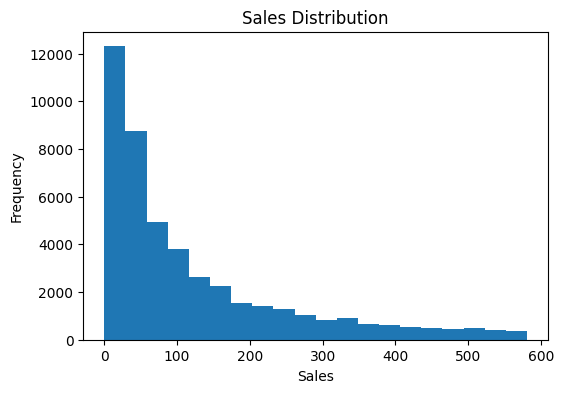

In [35]:
plt.figure(figsize=(6,4))
plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

9.2 Boxplot – Identify Outliers

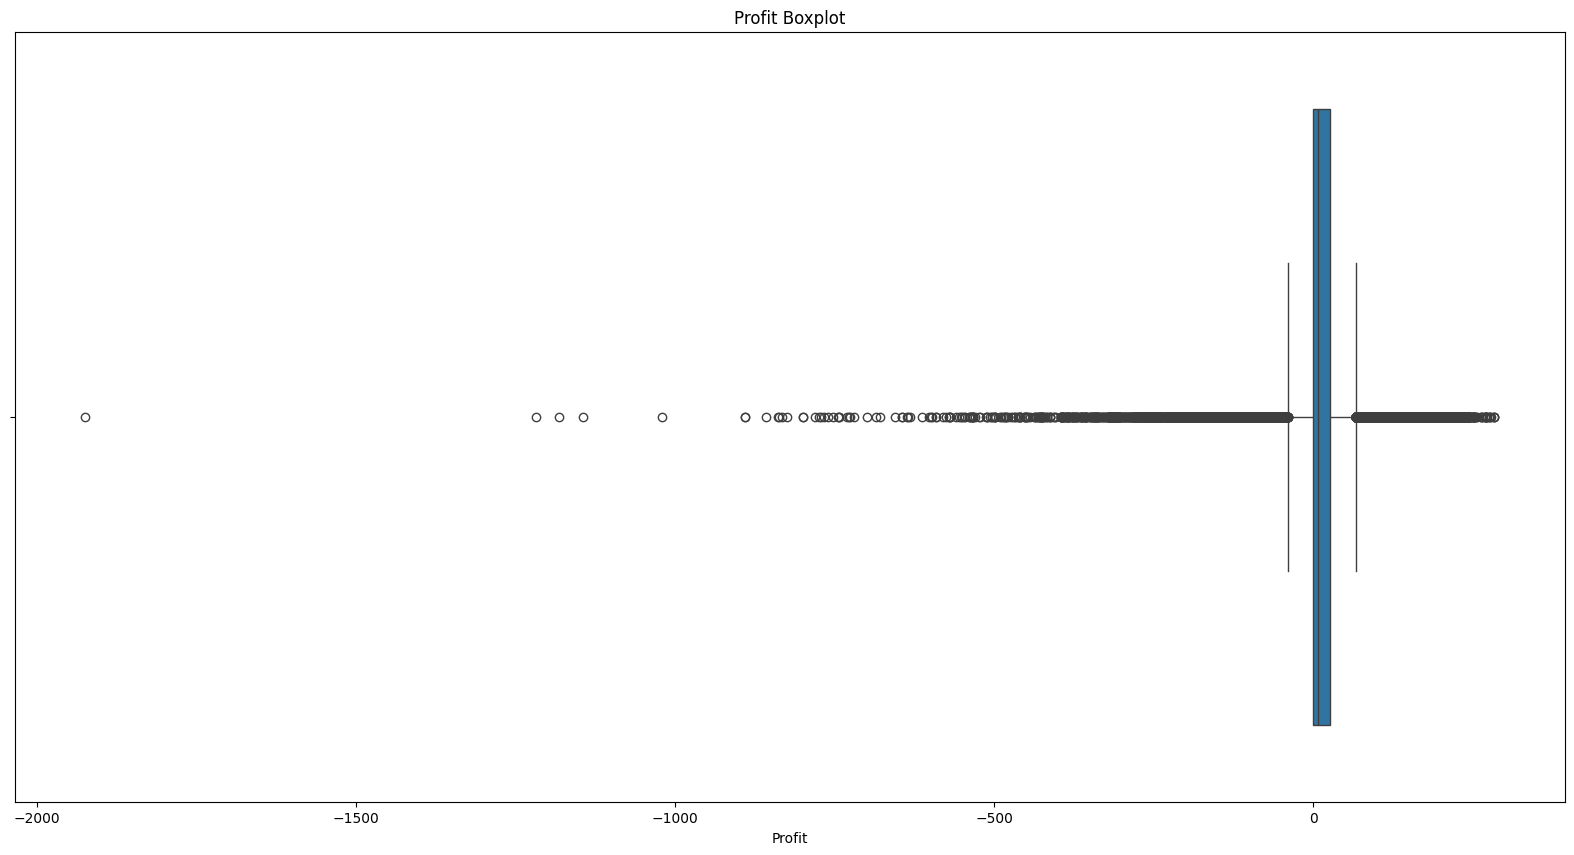

In [36]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Profit'], patch_artist=True)
plt.title("Profit Boxplot")
plt.show()

9.3 Correlation Matrix
- Show Relationship between numeric features

In [37]:
corr = df[['Sales', 'Profit', 'Discount']].corr()
corr

,Sales,Profit,Discount
Sales,1.000000,0.203598,-0.119976
Profit,0.203598,1.000000,-0.518936
Discount,-0.119976,-0.518936,1.000000


9.4 Heatmap – Correlation Visualization
- Visual understanding of relationships

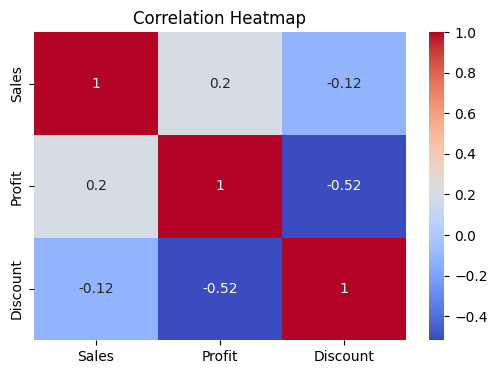

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## STEP 10: Key Observations
## Observations from EDA

- Sales data shows moderate variation with some outliers.
- Profit has a positive correlation with Sales.
- Discount shows a negative correlation with Profit.
- Data is now clean and suitable for further analysis.